# 核心能力提升班商业智能方向 004期 Week 10

### Thinking 1：高德地图中的路径规划原理是怎样的？

基本原理应该是Dijkstra算法，又称为单源最短路径算法。使用贪心策略计算从起点到指定顶点的最短路径，通过不断选择距离起点最近的顶点，来逐渐扩大最短路径权值，直到覆盖图中所有顶点。 

### Thinking 2: football.gml数据集中，美国大学生足球联赛，包括115支球队，被分为12个联盟。为什么使用LPA标签传播进行社区发现，只发现了11个社区？

LPA主要思想是起初每个节点拥有独立的标签，那么网络中有n不同标签，每次迭代中对于每个节点将其标签更改为其邻接点中出现次数最多的标签，如果这样的标签有多个，则随机选择一个。通过迭代，直到每个节点的标签与其邻接点中出现次数最多的标签相同，则达到稳定状态，算法结束。此时具有相同标签的节点即属于同一个社区。  
所以，有可能12个联盟中某两个联盟关系比较密切，也就是经常一起打比赛，LPA发现了11个社区，而12个联盟可能是因为地域等原因划分的，与球队的实际互动情况未必是匹配的。

### Thinking 3: 微博采用了类似FaceBook的EdgeRank算法，如果你给微博的信息流做设计，你会如何设计？

首先要考虑给用户推送用户感兴趣的信息，这时要考虑用户A曾经点赞转发关注用户B的微博可能是用户A很喜欢用户B提供的内容，如果用户B也反过来点赞转发关注用户A，那么说明两用户之间关系很紧密。可以按照用户之间的互动紧密程度来排名信息。除此之外，还要考虑微博内容与当前热点的关联程度，优先推送热门的微博。

### Action 1: 使用Python模拟下面的PageRank计算过程，求每个节点的影响力（迭代100次）
![image.png](./Pic1.png)

In [1]:
import numpy as np

In [2]:
M = np.array([[0  , 0, 0, 1/3, 0  , 0],
              [1/4, 0, 0, 0  , 1/2, 0],
              [0  , 1, 0, 1/3, 1/2, 0],
              [1/4, 0, 0, 0  , 0  , 1],
              [1/4, 0, 1, 1/3, 0  , 0],
              [1/4, 0, 0, 0  , 0  , 0]]) 

In [3]:
b = np.array([1/len(M) for i in range(len(M))])
b

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

### PageRank简化模型

In [4]:
def work(a, w, I=100):
    for i in range(I):
        w = np.dot(a, w)
        print("i:{:3}".format(i+1), w)

In [5]:
work(M, b)

i:  1 [0.05555556 0.125      0.30555556 0.20833333 0.26388889 0.04166667]
i:  2 [0.06944444 0.14583333 0.32638889 0.05555556 0.38888889 0.01388889]
i:  3 [0.01851852 0.21180556 0.3587963  0.03125    0.36226852 0.01736111]
i:  4 [0.01041667 0.18576389 0.40335648 0.02199074 0.37384259 0.00462963]
i:  5 [0.00733025 0.18952546 0.38001543 0.0072338  0.4132909  0.00260417]
i:  6 [0.00241127 0.20847801 0.39858218 0.00443673 0.38425926 0.00183256]
i:  7 [0.00147891 0.19273245 0.40208655 0.00243538 0.4006639  0.00060282]
i:  8 [8.11792695e-04 2.00701678e-01 3.93876190e-01 9.72543724e-04
 4.03268068e-01 3.69727366e-04]
i:  9 [3.24181241e-04 2.01836982e-01 4.02659894e-01 5.72675540e-04
 3.94403319e-01 2.02948174e-04]
i: 10 [1.90891847e-04 1.97282705e-01 3.99229534e-01 2.83993484e-04
 4.02931831e-01 8.10453104e-05]
i: 11 [9.46644947e-05 2.01513638e-01 3.98843285e-01 1.28768272e-04
 3.99371921e-01 4.77229617e-05]
i: 12 [4.29227573e-05 1.99709627e-01 4.01242522e-01 7.13890854e-05
 3.98909874e-01 2.3

### PageRank的随机浏览模型

In [6]:
def random_work(a, w, n, I=100):
    d = 0.85
    for i in range(I):
        w = (1-d)/n + d*np.dot(a, w)
        print("i:{:3}".format(i+1), w)

In [7]:
random_work(M, b, len(M))

i:  1 [0.07222222 0.13125    0.28472222 0.20208333 0.24930556 0.06041667]
i:  2 [0.08225694 0.14630208 0.29977431 0.09170139 0.33961806 0.04034722]
i:  3 [0.05098206 0.18681727 0.3196765  0.07677474 0.32326982 0.0424796 ]
i:  4 [0.04675284 0.17322336 0.3429372  0.07194135 0.32931156 0.03583369]
i:  5 [0.04538338 0.17489239 0.33258065 0.06539361 0.34681498 0.03493498]
i:  6 [0.04352819 0.18204034 0.33958309 0.0643387  0.33586571 0.03464397]
i:  7 [0.0432293  0.17699267 0.34070651 0.06369711 0.34112467 0.03424974]
i:  8 [0.04304752 0.17916421 0.33846927 0.06329851 0.34183428 0.03418623]
i:  9 [0.04293458 0.17942716 0.34050372 0.06320589 0.33978105 0.0341476 ]
i: 10 [0.04290834 0.17853054 0.33982837 0.06314906 0.3414601  0.0341236 ]
i: 11 [0.04289223 0.17923856 0.33976374 0.06312308 0.34086437 0.03411802]
i: 12 [0.04288487 0.17898196 0.34010501 0.06311492 0.34079865 0.0341146 ]
i: 13 [0.04288256 0.17895246 0.33985665 0.06311044 0.34108485 0.03411304]
i: 14 [0.04288129 0.17907361 0.3399519

### 使用networkx工具

![image.png](./Pic1.png)

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
edges = [("A", "B"), ("A", "D"), ("A", "E"), ("A", "F"), ("B", "C"), ("C", "E"), ("D", "A"), ("D", "C"), ("D", "E"), ("E", "B"), ("E", "C"), ("F", "D")]

In [10]:
# 创建有向图
G = nx.DiGraph()

In [11]:
# 在有向图G中添加边集合
for edge in edges:
    G.add_edge(edge[0], edge[1])

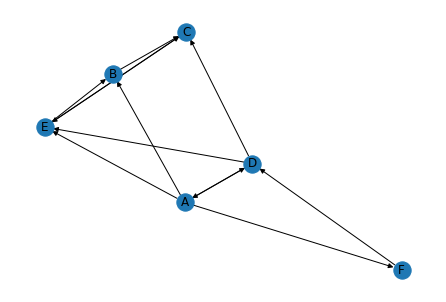

In [12]:
# 有向图可视化
layout = nx.spring_layout(G)
nx.draw(G, pos=layout, with_labels=True)
plt.show()

In [13]:
# 计算简化模型的PR值
pr = nx.pagerank(G, alpha=1)
print("简化模型的PR值：", pr)

简化模型的PR值： {'A': 4.362295028000273e-11, 'B': 0.20000025428691245, 'D': 6.554246553540412e-11, 'E': 0.40000101720462666, 'F': 2.182304589249693e-11, 'C': 0.39999872837747247}


In [14]:
# 计算随机模型的PR值
pr = nx.pagerank(G, alpha=0.8)
print("随机模型的PR值：", pr)

随机模型的PR值： {'A': 0.05457227274629779, 'B': 0.1739298544597237, 'D': 0.07964601975580721, 'E': 0.32420479237073513, 'F': 0.0442477883111521, 'C': 0.32339927235628396}


### Action 2: 使用TextRank对新闻进行关键词提取，及文章摘要输出  
新闻文本见：news_高考.txt  https://new.qq.com/rain/a/20200724A0EFCU00

In [15]:
from textrank4zh import TextRank4Keyword, TextRank4Sentence
import jieba

In [16]:
with open('data/news_高考.txt', 'r') as f:
    news = f.read()
news

'7月23日，在万般期待中，各地2020年高考录取分数线陆续公布，拿到分数后的考生们可谓有人欢喜有人愁。安徽省当天也公布了录取分数线，其中文理科一本分数线分别为541分和515分，二本分数线分别为499分和435分。那么被称为亚洲最大的“高考工厂”毛坦厂中学高考成绩怎样？图为毛坦厂中学教室午休的考生。\n7月23日，毛坦厂中学所在的安徽六安市毛坦厂镇官方发布喜报称，根据网络查询，六安市毛坦厂中学、金安高级中学、金安中学补习班2020年高考再创佳绩，再传捷报，安徽籍考生（不含外省考生）本科达线人数10176人，其中600分以上600分以上290人，理科最高分674分，文科最高分608分。也就是在2020年高考中，高考镇有1万多人达到本科线，听起来多少有点让人吃惊，这个数字还不包括其他十几个省份在毛坦厂复读的数百名考生。图为高考镇放学盛大的场面。今年的高考很特殊，因为疫情课业停摆两个多月，随后高考推迟一个月才考试，而就在考试进行时，安徽歙县因为洪水语文和数学被延期考试，湖北黄梅的考生硬是蹚水去考场，而云南一地的考生，考试时还发生了地震。图为高考前，高考镇的卡点。毛坦厂镇因为高考而驰名，被称为“亚洲最大的高考工厂”，外媒曾称该镇是一座偏僻的单一产业城镇，出产的是应试机器，就像其他一些专门生产袜子或圣诞饰品的中国乡镇一样心无旁骛。毛坦厂镇今年参加高考的考生人数超过1.7万人，涉及全国十多个省份。图为考生在上晚自习。\n据悉，毛坦厂镇面积只有3.5平方公里，人口不过万余人，从1999年后，毛坦厂中学借高考复读声名鹊起，每年都要吸引2万多学生和1万多陪读家长，整个小镇接近5万人。租房、生活、学习，众多学生和家长的到来，小镇的经济都围绕着“高考”在转。图为每天早晨，陪读家长在洗衣。在高考前，为了保障高考的顺利进行，高考镇实行了史上最严的“封锁”，在疫情开始之初，通往毛坦厂镇的所有道路都被切断，4月初，安徽省境内高三年级开始复课之后，因为外来复读学生较多，毛坦厂镇曾经短暂对外地家长和考生开放了几天，随之又实行严格管控，一直到7月5日考生离开高考镇时才解封。图为高考前，考生进入学校测量体温。也正是如此，今年的高考镇比往年低调了很多，连往年最热闹的送考节也没有举行，而是和其他所有普通学校一样，用几辆大巴将考生送到市区考试。图为往年的送考节。和衡水中学不一样，到高考镇来学习的都是普通考生

In [17]:
news_cut = jieba.cut(news, cut_all=False)
"/".join(news_cut)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.064 seconds.
Prefix dict has been built successfully.


'7/月/23/日/，/在/万般/期待/中/，/各地/2020/年/高考/录取/分数线/陆续/公布/，/拿到/分数/后/的/考生/们/可谓/有人/欢喜/有人/愁/。/安徽省/当天/也/公布/了/录取/分数线/，/其中/文理科/一本/分数线/分别/为/541/分/和/515/分/，/二本/分数线/分别/为/499/分/和/435/分/。/那么/被/称为/亚洲/最大/的/“/高考/工厂/”/毛坦厂/中学/高考/成绩/怎样/？/图为/毛坦厂/中学/教室/午休/的/考生/。/\n/7/月/23/日/，/毛坦厂/中学/所在/的/安徽/六安市/毛坦厂/镇/官方/发布/喜报/称/，/根据/网络/查询/，/六安市/毛坦厂/中学/、/金安/高级中学/、/金安/中学/补习班/2020/年/高考/再创/佳绩/，/再/传捷报/，/安徽/籍/考生/（/不/含/外省/考生/）/本科/达线/人数/10176/人/，/其中/600/分/以上/600/分/以上/290/人/，/理科/最高分/674/分/，/文科/最高分/608/分/。/也/就是/在/2020/年/高考/中/，/高考/镇有/1/万多/人/达到/本科/线/，/听/起来/多少/有点/让/人/吃惊/，/这个/数字/还/不/包括/其他/十几个/省份/在/毛坦厂/复读/的/数百名/考生/。/图为/高考/镇/放学/盛大/的/场面/。/今年/的/高考/很/特殊/，/因为/疫情/课业/停摆/两个/多月/，/随后/高考/推迟/一个月/才/考试/，/而/就/在/考试/进行/时/，/安徽/歙县/因为/洪水/语文/和/数学/被/延期/考试/，/湖北/黄梅/的/考生/硬是/蹚/水去/考场/，/而/云南/一地/的/考生/，/考试/时/还/发生/了/地震/。/图为/高考/前/，/高考/镇/的/卡点/。/毛坦厂/镇/因为/高考/而/驰名/，/被/称为/“/亚洲/最大/的/高考/工厂/”/，/外媒/曾/称/该镇/是/一座/偏僻/的/单一/产业/城镇/，/出产/的/是/应试/机器/，/就/像/其他/一些/专门/生产/袜子/或/圣诞/饰品/的/中国/乡镇/一样/心无旁骛/。/毛坦厂/镇/今年/参加/高考/的/考生/人数/超过/1.7/万人/，/涉及/全国/十多个/省份/。/图为/考生/在/上/晚自习/。/\n/据悉/，/毛坦厂/镇/面积/只有/3.5/平方公里/，/人口/

In [18]:
jieba.add_word("毛坦厂")
jieba.add_word("高考镇")
jieba.add_word("送考节")

In [19]:
# 输出关键词，设置文本小写，窗口为2
tr4w = TextRank4Keyword()
tr4w.analyze(text=news, lower=True, window=3)
print('关键词：')
for item in tr4w.get_keywords(20, word_min_len=2):
    print(item.word, item.weight)

关键词：
考生 0.048915832876928744
高考 0.04185112749808862
中学 0.023829540490872013
考试 0.014538805860984966
安徽 0.01320748165876597
家长 0.01250056639964384
今年 0.011083388351025777
复读 0.011068165978740175
公布 0.010472036874521624
安徽省 0.010215584709022165
六安市 0.010011582762333692
分数线 0.009930014709001008
疫情 0.009760003158644125
人数 0.009569435700939488
学习 0.009181725930165762
学生 0.008808516692573126
学校 0.008746819147097875
出产 0.008537371142057756
录取 0.008439690875381713
中国 0.00789371167880466


In [20]:
# 输出重要的句子
tr4s = TextRank4Sentence()
tr4s.analyze(text=news, lower=True, source = 'all_filters')
# 重要性较高的三个句子
sens = tr4s.get_key_sentences(num=3)
for item in sens:
    # index是语句在文本中位置，weight表示权重
    print(item.index, item.weight, item.sentence)

4 0.06638570146506294 7月23日，毛坦厂中学所在的安徽六安市毛坦厂镇官方发布喜报称，根据网络查询，六安市毛坦厂中学、金安高级中学、金安中学补习班2020年高考再创佳绩，再传捷报，安徽籍考生（不含外省考生）本科达线人数10176人，其中600分以上600分以上290人，理科最高分674分，文科最高分608分
15 0.06074184331453228 在高考前，为了保障高考的顺利进行，高考镇实行了史上最严的“封锁”，在疫情开始之初，通往毛坦厂镇的所有道路都被切断，4月初，安徽省境内高三年级开始复课之后，因为外来复读学生较多，毛坦厂镇曾经短暂对外地家长和考生开放了几天，随之又实行严格管控，一直到7月5日考生离开高考镇时才解封
16 0.06054839516654739 图为高考前，考生进入学校测量体温


In [21]:
print('摘要：', "。".join([sen.sentence for sen in sorted(sens, key=lambda x: x['index'])]), end="。")

摘要： 7月23日，毛坦厂中学所在的安徽六安市毛坦厂镇官方发布喜报称，根据网络查询，六安市毛坦厂中学、金安高级中学、金安中学补习班2020年高考再创佳绩，再传捷报，安徽籍考生（不含外省考生）本科达线人数10176人，其中600分以上600分以上290人，理科最高分674分，文科最高分608分。在高考前，为了保障高考的顺利进行，高考镇实行了史上最严的“封锁”，在疫情开始之初，通往毛坦厂镇的所有道路都被切断，4月初，安徽省境内高三年级开始复课之后，因为外来复读学生较多，毛坦厂镇曾经短暂对外地家长和考生开放了几天，随之又实行严格管控，一直到7月5日考生离开高考镇时才解封。图为高考前，考生进入学校测量体温。